<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/FinalProject_Regression_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FinalProject_Regression 
# Adam Winders
# CS-430-ON
# Machine Learning in the Cloud
<br>

## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [4]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Acquire Data

Imports the dataframe

In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/life_expectancy.csv')

### Statistical and Visual Exploration

Displays the first five rows

In [14]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Displays the last five rows

In [15]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


Displays five random rows

In [16]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1390,Kiribati,2003,Developing,64.7,215.0,0,0.50,1.765413,73.0,0,...,79.0,9.98,7.0,0.1,115.38650,88895.0,0.2,0.2,0.000,11.6
2378,Somalia,2014,Developing,54.3,321.0,51,0.01,0.000000,42.0,10229,...,47.0,NaN,42.0,0.8,417.89143,NaN,6.7,6.5,NaN,NaN
628,Costa Rica,2012,Developing,79.2,97.0,1,3.34,2568.237059,91.0,0,...,9.0,9.56,91.0,0.1,9985.36959,4654122.0,1.8,1.7,0.758,13.6
1603,Maldives,2014,Developing,78.2,62.0,0,0.01,2051.748615,99.0,0,...,99.0,13.73,99.0,0.1,7716.24150,41.0,13.6,13.7,0.693,12.7
1702,Micronesia (Federated States of),2012,Developing,69.0,168.0,0,2.98,0.000000,82.0,0,...,81.0,12.77,81.0,0.1,NaN,NaN,0.2,0.2,0.640,11.7


Displays all columns

In [17]:
pd.set_option('display.max_columns', None)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [22]:
df.columns = df.columns.str.replace(' ', '')

Renames columns

In [46]:
df.rename(columns=
{'Country':'country'
,'Year':'year'
,'Status':'status'
,'Lifeexpectancy':'life_expectancy'
,'AdultMortality':'adult_mortality'
,'infantdeaths':'infant_deaths'
,'Alcohol':'alcohol'
,'percentageexpenditure':'percentage_expenditure'
,'HepatitisB':'hep_b'
,'Measles':'measles'
,'BMI':'bmi'
,'under-fivedeaths':'<5_deaths'
,'Polio':'polio'
,'Totalexpenditure':'total_expenditure'
,'Diphtheria':'diptheria'
,'HIV/AIDS':'hiv_aids'
,'GDP':'gdp'
,'Population':'population'
,'thinness1-19years':'thinness_1-19_years'
,'thinness5-9years':'thinness_5-9_years'
,'Incomecompositionofresources':'income_comp_of_resources'
,'Schooling':'schooling'
}, inplace = True)

df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hep_b,measles,bmi,<5_deaths,polio,total_expenditure,diptheria,hiv_aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Returns standard stats for each column (count, mean, etc.)

In [47]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hep_b,measles,bmi,<5_deaths,polio,total_expenditure,diptheria,hiv_aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_comp_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Displays data types of all columns

In [48]:
df.dtypes

country                      object
year                          int64
status                       object
life_expectancy             float64
adult_mortality             float64
infant_deaths                 int64
alcohol                     float64
percentage_expenditure      float64
hep_b                       float64
measles                       int64
bmi                         float64
<5_deaths                     int64
polio                       float64
total_expenditure           float64
diptheria                   float64
hiv_aids                    float64
gdp                         float64
population                  float64
thinness_1-19_years         float64
thinness_5-9_years          float64
income_comp_of_resources    float64
schooling                   float64
dtype: object

Displays data type in **year** column

In [50]:
df.year

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: year, Length: 2938, dtype: int64

Scatter plot

<Axes: title={'center': 'Price vs. Date'}, xlabel='Country', ylabel='Deaths under 5 years old'>

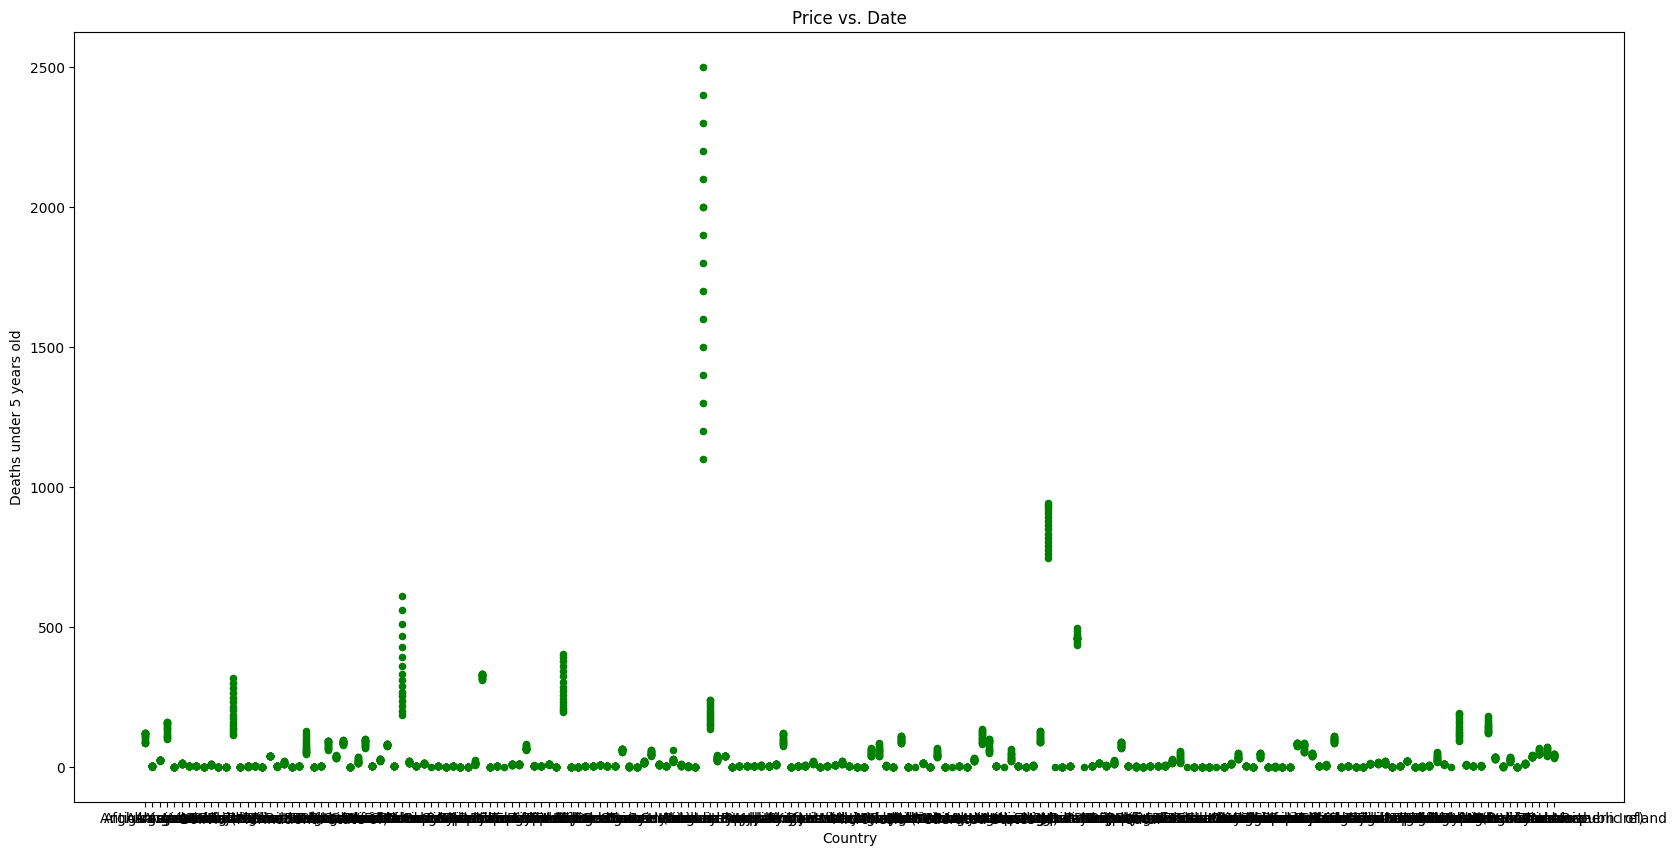

In [52]:
df.plot(kind='scatter',x='country',xlabel='Country',y='<5_deaths',ylabel='Deaths under 5 years old',c = 'green',title="Price vs. Date",figsize=(20,10))

<Axes: title={'center': 'Price vs. Date'}, xlabel='Date', ylabel='Closing Price'>

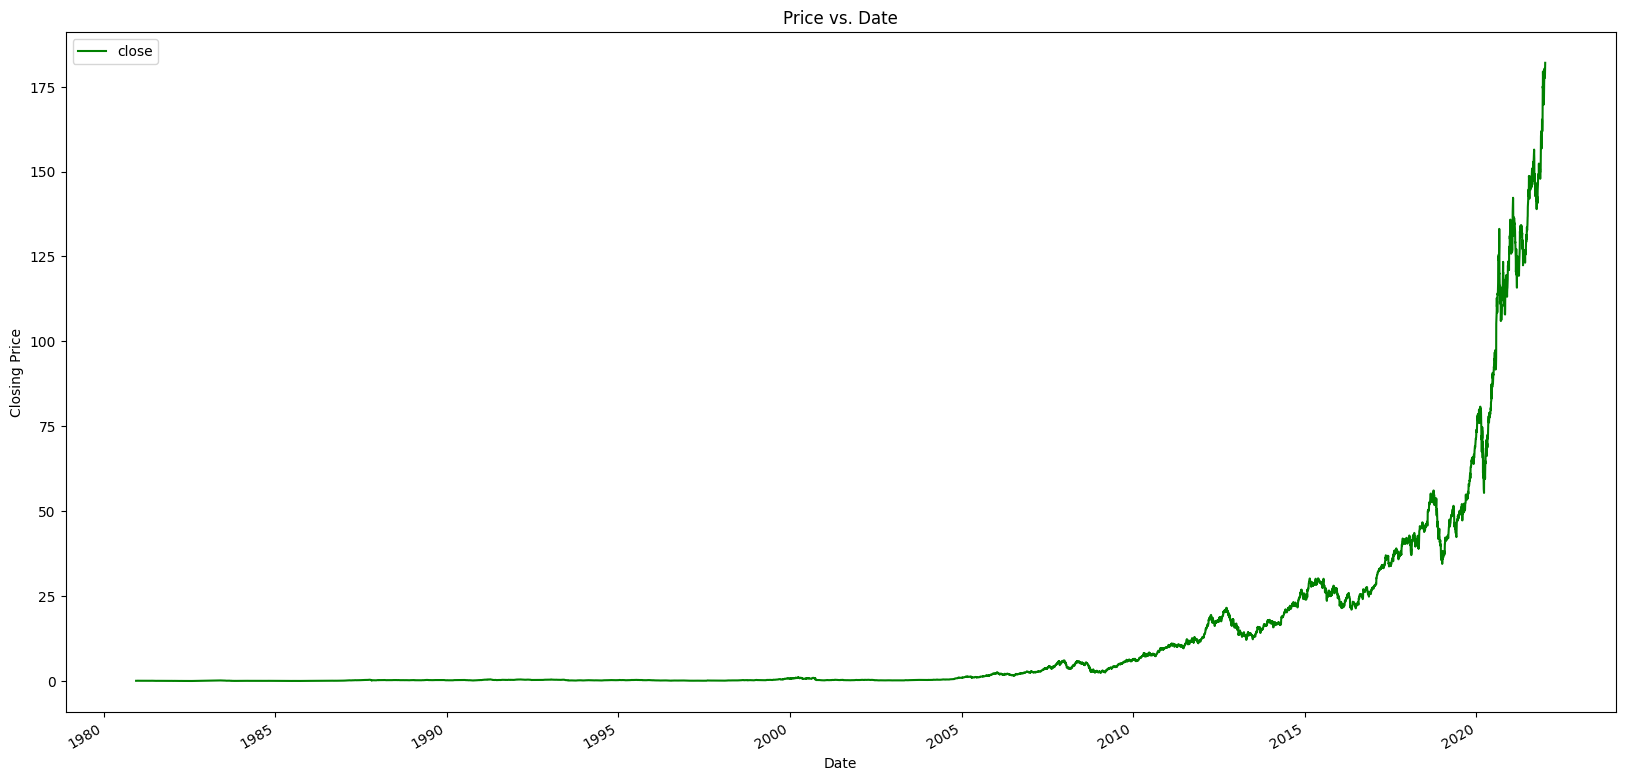

In [ ]:
df.plot(x='date',xlabel='Date',y='close',ylabel='Closing Price',c = 'green',title="Price vs. Date",figsize=(20,10))

Box plot

<Axes: >

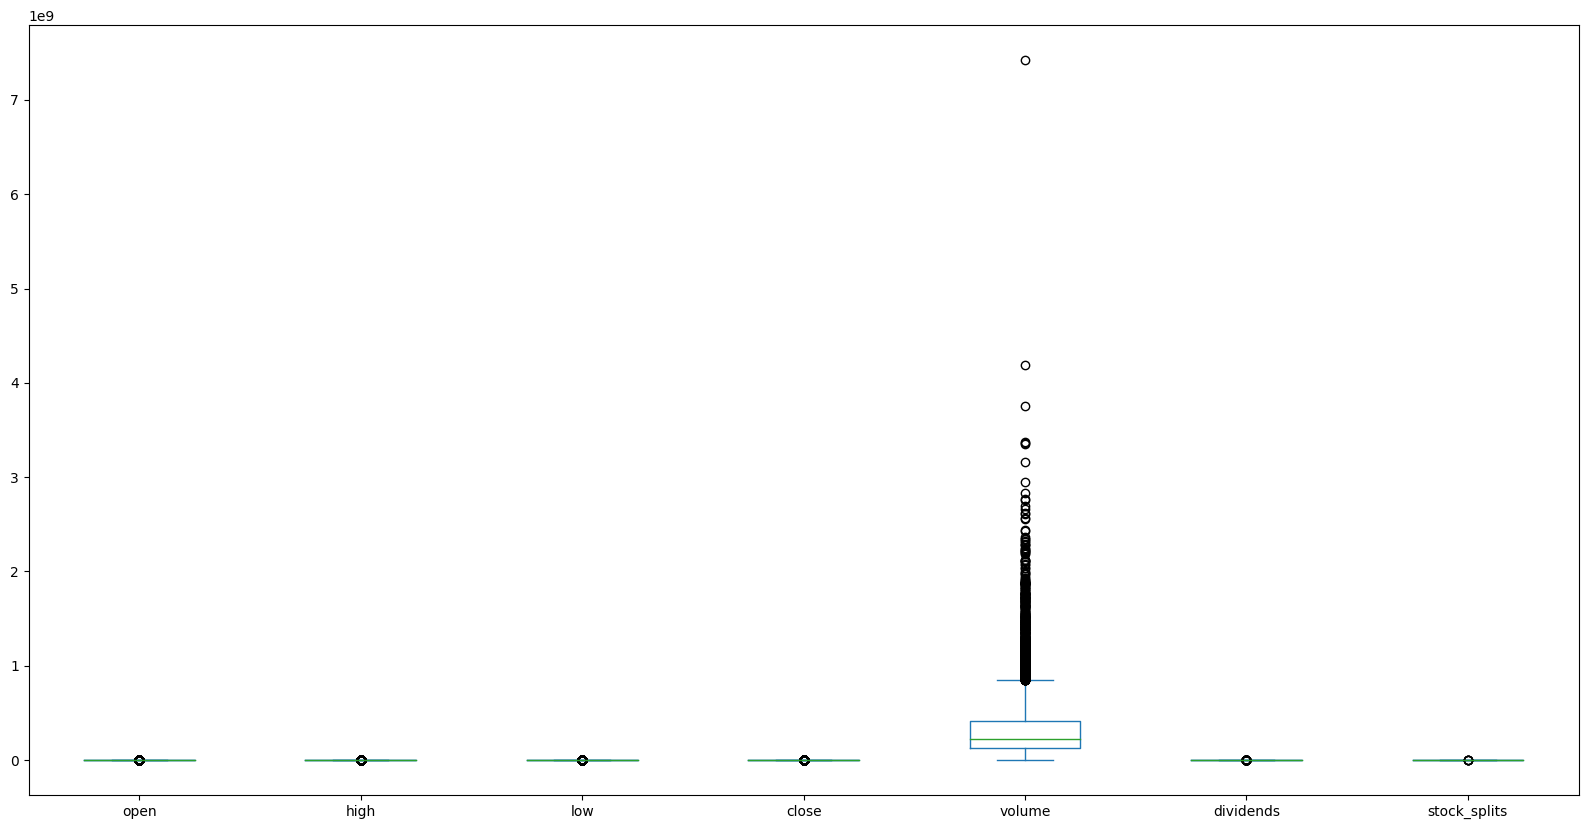

In [ ]:
df.plot(kind='box',figsize=(20,10))

In [ ]:
df.plot(kind='bar',figsize=(10,5), title='Price vs. Date')

<Axes: title={'center': 'Price vs. Date'}>

Error in callback <function _draw_all_if_interactive at 0x7fc385479820> (for post_execute):


OverflowError: ignored

OverflowError: ignored

<Figure size 1000x500 with 1 Axes>

In [ ]:
df_melted = pd.melt(df)
sns.boxplot(x='variable',y='variable',data=df_melted)
# boxplot = df.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

TypeError: ignored

<ipython-input-189-bebef5b3c7ce>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

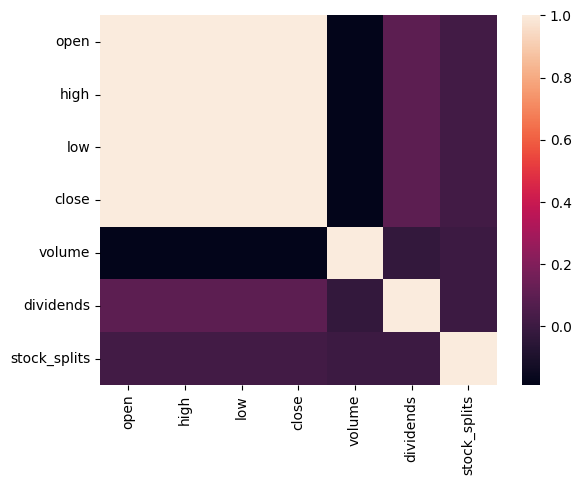

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.

## Problem 2

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.